# Machine Learning

## Answer 8

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Pre Placement Assesment\\Placement-assignment_Pranit-Anap\\Machine Learning\\train.csv\\train.csv")

### Preprocessing the data 

In [4]:
train.replace(np.nan, " ", inplace= True)

In [5]:
def case_convert():
    train.question1 = [i.lower() for i in train.question1]
    train.question2 = [i.lower() for i in train.question2]


def remove_specials():
    train.question1 = [re.sub(r"[^a-zA-Z]", " ", text) for text in train.question1]
    train.question2 = [re.sub(r"[^a-zA-Z]", " ", text) for text in train.question2]
    

def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in train.question1:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    train.question1 = texts
    texts.clear()
    for item in train.question2:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    train.question2 = texts
    texts.clear()
    

def remove_accents():
    train.question1 = [unidecode.unidecode(text) for text in train.question1]
    train.question2 = [unidecode.unidecode(text) for text in train.question2]
    
def normalize_spaces():
    train.question1 = [re.sub(r"\s+", " ", text) for text in train.question1]
    train.question2 = [re.sub(r"\s+", " ", text) for text in train.question2]
    

In [13]:
case_convert()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()

In [14]:
#word len
train['q1_len']=train['question1'].str.len()
train['q2_len']=train['question2'].str.len()

#word count
train['q1_word']=train['question1'].apply(lambda x: len(x.split(" ")))
train['q2_word']=train['question2'].apply(lambda x: len(x.split(" ")))


#common words

train['s1']=train['question1'].apply(lambda x: x.split(" "))
train['s2']=train['question1'].apply(lambda x: x.split(" "))
train['common_words']= [len(set(a) & set(b)) for a, b in zip(train.s1, train.s2)]
train.drop(['s1','s2'],axis=1,inplace=True)


#common words share

train['word_share_q1']=round(train['common_words']/train['q1_word'],2)
train['word_share_q2']=round(train['common_words']/train['q2_word'],2)

### Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2072\277373564.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['is_duplicate']==0]['q1_word'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2072\277373564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['is_duplicate']=

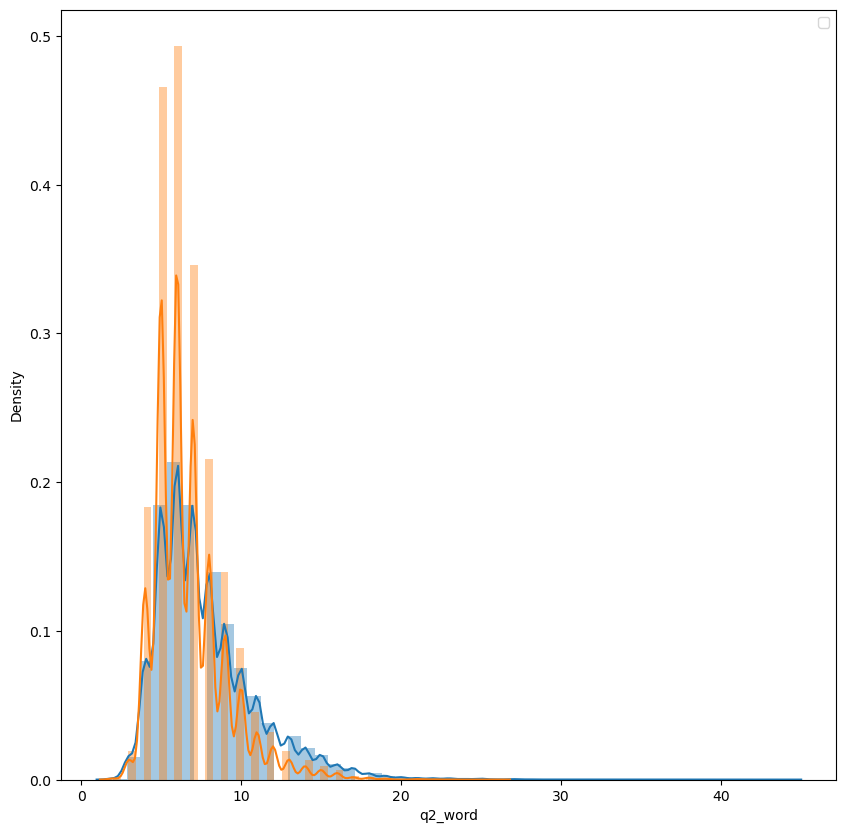

In [15]:
plt.figure(figsize=(10,10))
sns.distplot(train[train['is_duplicate']==0]['q1_word'])
sns.distplot(train[train['is_duplicate']==1]['q2_word'])
plt.legend()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2072\50570088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['is_duplicate']==0]['word_share_q1'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2072\50570088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['is_duplicat

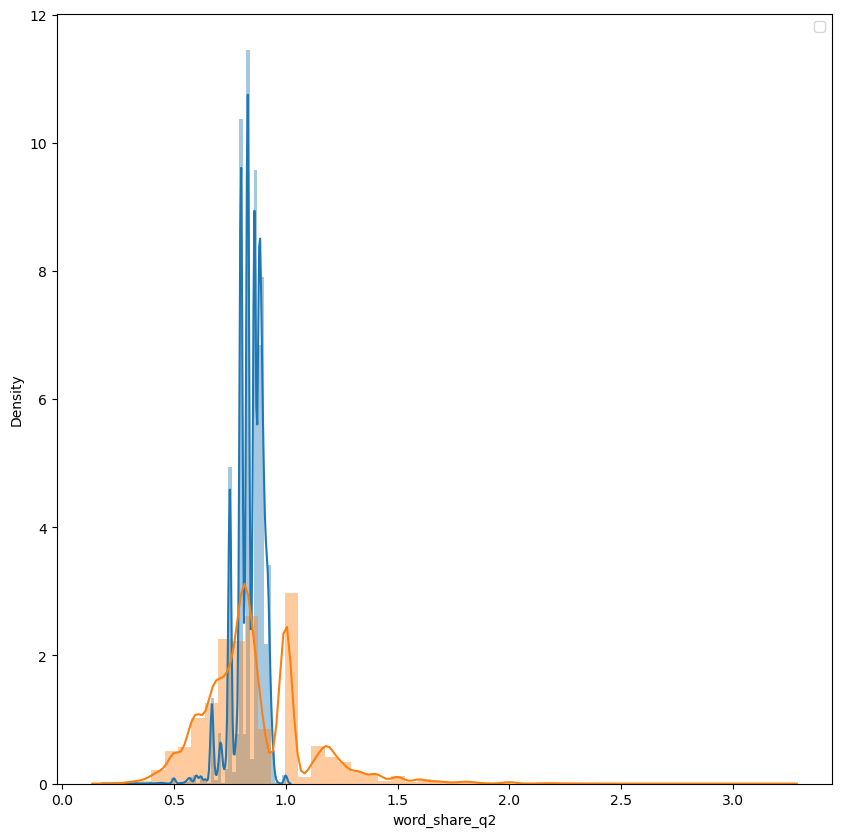

In [16]:
plt.figure(figsize=(10,10))
sns.distplot(train[train['is_duplicate']==0]['word_share_q1'])
sns.distplot(train[train['is_duplicate']==1]['word_share_q2'])
plt.legend()
plt.show()

Minimum length: 1
Maximum length: 248
Average length: 38


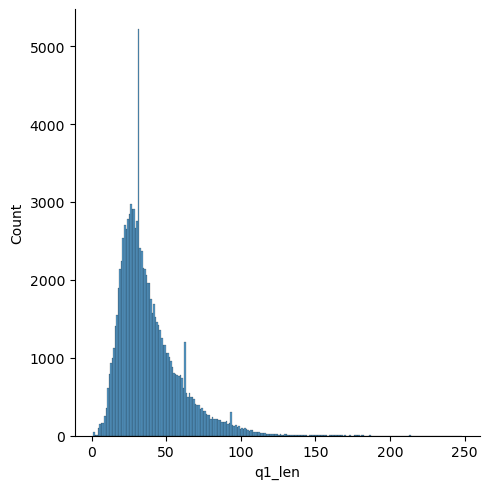

In [17]:
sns.displot(train['q1_len'])
print('Minimum length:', train['q1_len'].min())
print('Maximum length:', train['q1_len'].max())
print('Average length:', int(train['q1_len'].mean()))

In [18]:
train = train.sample(100000, replace=True)

In [19]:
x = train.drop(['is_duplicate'], axis=1)
y = train['is_duplicate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Mapping the words in the questions using TF-IDF

In [20]:
vector = TfidfVectorizer(max_features=5000)
train_df = vector.fit_transform(x_train['question1'] + ' ' + x_train['question2']).toarray()
test_df = vector.fit_transform(x_test['question1']+ ' ' + x_test['question2'] ).toarray()
x_train = x_train.drop(['question1', 'question2'], axis=1)
x_test = x_test.drop(['question1', 'question2'], axis=1)
x_train = np.concatenate([x_train.to_numpy(), train_df], axis=1)
x_test = np.concatenate([x_test.to_numpy(), test_df], axis=1)

### Model training and evaluation

In [21]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81     27223
           1       0.36      0.76      0.49      5777

    accuracy                           0.72     33000
   macro avg       0.65      0.73      0.65     33000
weighted avg       0.83      0.72      0.75     33000



In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test)

0.7195151515151516